<a href="https://colab.research.google.com/github/JoshuaHildebrand/CMSC320_Project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [5]:
df = pd.read_csv('Popular_Spotify_Songs.csv', encoding='latin1')
display(df)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [6]:
df.nunique()

,0
track_name,943
artist(s)_name,645
artist_count,8
released_year,50
released_month,12
released_day,31
in_spotify_playlists,879
in_spotify_charts,82
streams,949
in_apple_playlists,234


# What is the distribution of Spotify, Apple, Shazam, and Deezer charts and How do These Variables Correlate?

In [73]:
charts_df = df
charts_df['in_shazam_charts'] = charts_df['in_shazam_charts'].astype(str)
charts_df['in_shazam_charts'] = charts_df['in_shazam_charts'].str.replace(',','',regex = False)
charts_df['in_shazam_charts'] = charts_df['in_shazam_charts'].astype(int)

charts_df = charts_df[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']]

df_corr = charts_df.corr().style.background_gradient(cmap='RdBu')

display(df_corr)


,in_spotify_charts,in_apple_charts,in_deezer_charts,in_shazam_charts
in_spotify_charts,1.000000,0.552232,0.600205,0.569568
in_apple_charts,0.552232,1.000000,0.383668,0.401411
in_deezer_charts,0.600205,0.383668,1.000000,0.395786
in_shazam_charts,0.569568,0.401411,0.395786,1.000000


<Axes: >

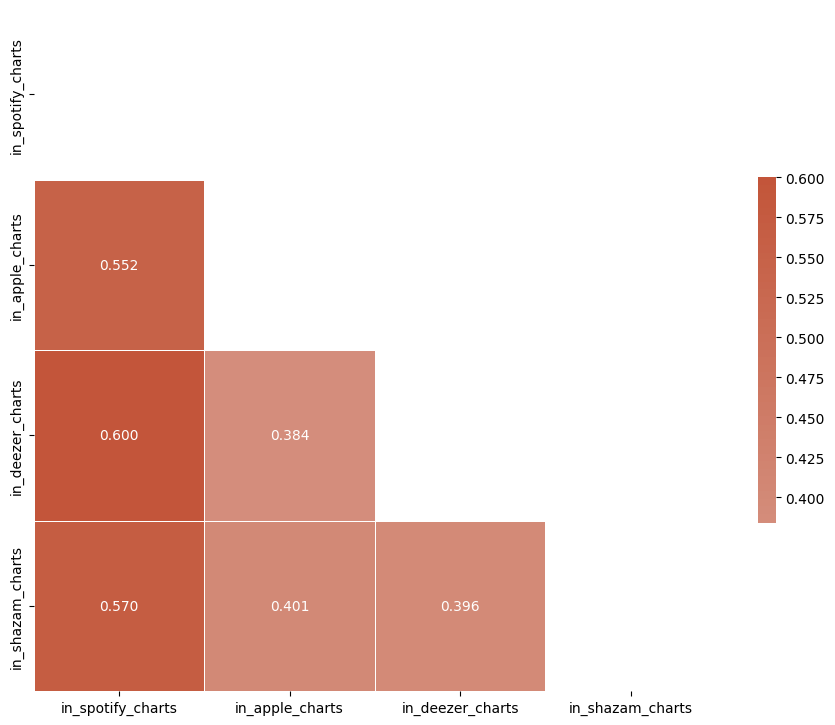

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr.data, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr.data, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, fmt = '.3f', annot = True)